In [247]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math

In [272]:
data = pd.read_csv('LIBOR.csv')
data.head()

,DATE,close
0,2/13/13,0.2901
1,2/14/13,0.2901
2,2/15/13,0.2901
3,2/18/13,0.2891
4,2/19/13,0.2891


In [273]:
#We will be using the closing data of MMM(want to do something other than AAPL :))
cl = data.close
scl = MinMaxScaler()
#Scale the data
cl = cl.values.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.04175644],
       [0.04175644],
       [0.04175644],
       ...,
       [0.9857935 ],
       [0.99169218],
       [1.        ]])

In [274]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,1)
X_train,X_test = X[:int(X.shape[0]*0.9828)],X[int(X.shape[0]*0.9828):]
y_train,y_test = y[:int(y.shape[0]*0.9828)],y[int(y.shape[0]*0.9828):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1238
22
1238
22


In [275]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(1,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),shuffle=False)

Train on 1238 samples, validate on 22 samples
Epoch 1/600
1238/1238 [==============================] - 3s 3ms/step - loss: 0.0585 - val_loss: 0.3811
Epoch 2/600
1238/1238 [==============================] - 0s 369us/step - loss: 0.0339 - val_loss: 0.1853
Epoch 3/600
1238/1238 [==============================] - 0s 331us/step - loss: 0.0276 - val_loss: 0.1042
Epoch 4/600
1238/1238 [==============================] - 0s 229us/step - loss: 0.0167 - val_loss: 0.0463
Epoch 5/600
1238/1238 [==============================] - 0s 299us/step - loss: 0.0079 - val_loss: 0.0125
Epoch 6/600
1238/1238 [==============================] - 0s 235us/step - loss: 0.0025 - val_loss: 0.0011
Epoch 7/600
1238/1238 [==============================] - 0s 261us/step - loss: 4.0294e-04 - val_loss: 5.9245e-05
Epoch 8/600
1238/1238 [==============================] - 0s 325us/step - loss: 4.3727e-05 - val_loss: 3.3044e-04
Epoch 9/600
1238/1238 [==============================] - 0s 237us/step - loss: 2.8124e-05 - val_loss

Epoch 73/600
1238/1238 [==============================] - 0s 244us/step - loss: 7.9654e-06 - val_loss: 9.1928e-06
Epoch 74/600
1238/1238 [==============================] - 0s 234us/step - loss: 7.3496e-06 - val_loss: 8.5408e-06
Epoch 75/600
1238/1238 [==============================] - 0s 234us/step - loss: 7.0415e-06 - val_loss: 8.0867e-06
Epoch 76/600
1238/1238 [==============================] - 0s 281us/step - loss: 6.9021e-06 - val_loss: 7.7510e-06
Epoch 77/600
1238/1238 [==============================] - 0s 237us/step - loss: 6.8514e-06 - val_loss: 7.4833e-06
Epoch 78/600
1238/1238 [==============================] - 0s 236us/step - loss: 6.8501e-06 - val_loss: 7.2509e-06
Epoch 79/600
1238/1238 [==============================] - 0s 238us/step - loss: 6.8837e-06 - val_loss: 7.0450e-06
Epoch 80/600
1238/1238 [==============================] - 0s 240us/step - loss: 6.9504e-06 - val_loss: 6.8631e-06
Epoch 81/600
1238/1238 [==============================] - 0s 229us/step - loss: 7.0541e-

1238/1238 [==============================] - 0s 249us/step - loss: 4.7266e-05 - val_loss: 6.1234e-05
Epoch 145/600
1238/1238 [==============================] - 0s 237us/step - loss: 4.1020e-05 - val_loss: 5.8871e-05
Epoch 146/600
1238/1238 [==============================] - 0s 233us/step - loss: 3.5446e-05 - val_loss: 5.5115e-05
Epoch 147/600
1238/1238 [==============================] - 0s 243us/step - loss: 3.2804e-05 - val_loss: 5.1921e-05
Epoch 148/600
1238/1238 [==============================] - 0s 237us/step - loss: 3.2872e-05 - val_loss: 4.9869e-05
Epoch 149/600
1238/1238 [==============================] - 0s 236us/step - loss: 3.4858e-05 - val_loss: 4.8923e-05
Epoch 150/600
1238/1238 [==============================] - 0s 233us/step - loss: 3.7838e-05 - val_loss: 4.8837e-05
Epoch 151/600
1238/1238 [==============================] - 0s 243us/step - loss: 4.1043e-05 - val_loss: 4.9445e-05
Epoch 152/600
1238/1238 [==============================] - 0s 267us/step - loss: 4.3672e-05 - 

1238/1238 [==============================] - 0s 297us/step - loss: 2.3130e-05 - val_loss: 1.2726e-04
Epoch 216/600
1238/1238 [==============================] - 0s 256us/step - loss: 2.3677e-05 - val_loss: 1.3264e-04
Epoch 217/600
1238/1238 [==============================] - 0s 288us/step - loss: 2.4322e-05 - val_loss: 1.3874e-04
Epoch 218/600
1238/1238 [==============================] - 0s 376us/step - loss: 2.4953e-05 - val_loss: 1.4452e-04
Epoch 219/600
1238/1238 [==============================] - 0s 287us/step - loss: 2.5653e-05 - val_loss: 1.5054e-04
Epoch 220/600
1238/1238 [==============================] - 0s 353us/step - loss: 2.6381e-05 - val_loss: 1.5614e-04
Epoch 221/600
1238/1238 [==============================] - 0s 344us/step - loss: 2.7205e-05 - val_loss: 1.6142e-04
Epoch 222/600
1238/1238 [==============================] - 0s 250us/step - loss: 2.8132e-05 - val_loss: 1.6607e-04
Epoch 223/600
1238/1238 [==============================] - 0s 245us/step - loss: 2.9160e-05 - 

1238/1238 [==============================] - 0s 287us/step - loss: 1.1478e-04 - val_loss: 1.0659e-04
Epoch 287/600
1238/1238 [==============================] - 0s 319us/step - loss: 1.1656e-04 - val_loss: 9.4372e-05
Epoch 288/600
1238/1238 [==============================] - 0s 313us/step - loss: 1.1965e-04 - val_loss: 8.0972e-05
Epoch 289/600
1238/1238 [==============================] - 0s 279us/step - loss: 1.2502e-04 - val_loss: 6.8012e-05
Epoch 290/600
1238/1238 [==============================] - 0s 316us/step - loss: 1.3099e-04 - val_loss: 5.5403e-05
Epoch 291/600
1238/1238 [==============================] - 0s 335us/step - loss: 1.3736e-04 - val_loss: 4.2455e-05
Epoch 292/600
1238/1238 [==============================] - 0s 306us/step - loss: 1.4459e-04 - val_loss: 3.0574e-05
Epoch 293/600
1238/1238 [==============================] - 0s 346us/step - loss: 1.5520e-04 - val_loss: 1.9247e-05
Epoch 294/600
1238/1238 [==============================] - 0s 354us/step - loss: 1.7594e-04 - 

1238/1238 [==============================] - 0s 290us/step - loss: 1.0368e-05 - val_loss: 1.2593e-05
Epoch 358/600
1238/1238 [==============================] - 0s 308us/step - loss: 1.0527e-05 - val_loss: 1.1567e-05
Epoch 359/600
1238/1238 [==============================] - 0s 391us/step - loss: 1.0706e-05 - val_loss: 1.0590e-05
Epoch 360/600
1238/1238 [==============================] - 0s 364us/step - loss: 1.0903e-05 - val_loss: 9.6793e-06
Epoch 361/600
1238/1238 [==============================] - 0s 314us/step - loss: 1.1121e-05 - val_loss: 8.8572e-06
Epoch 362/600
1238/1238 [==============================] - 0s 321us/step - loss: 1.1358e-05 - val_loss: 8.1376e-06
Epoch 363/600
1238/1238 [==============================] - 0s 383us/step - loss: 1.1610e-05 - val_loss: 7.5256e-06
Epoch 364/600
1238/1238 [==============================] - 0s 344us/step - loss: 1.1881e-05 - val_loss: 7.0234e-06
Epoch 365/600
1238/1238 [==============================] - 0s 362us/step - loss: 1.2177e-05 - 

1238/1238 [==============================] - 0s 376us/step - loss: 5.4073e-05 - val_loss: 2.0096e-04
Epoch 429/600
1238/1238 [==============================] - 0s 384us/step - loss: 5.5150e-05 - val_loss: 2.0031e-04
Epoch 430/600
1238/1238 [==============================] - 0s 384us/step - loss: 5.6330e-05 - val_loss: 2.0097e-04
Epoch 431/600
1238/1238 [==============================] - 1s 413us/step - loss: 5.7352e-05 - val_loss: 2.0174e-04
Epoch 432/600
1238/1238 [==============================] - 1s 541us/step - loss: 5.8153e-05 - val_loss: 2.0169e-04
Epoch 433/600
1238/1238 [==============================] - 0s 394us/step - loss: 5.8924e-05 - val_loss: 2.0213e-04
Epoch 434/600
1238/1238 [==============================] - 0s 375us/step - loss: 5.9443e-05 - val_loss: 2.0232e-04
Epoch 435/600
1238/1238 [==============================] - 0s 365us/step - loss: 5.9634e-05 - val_loss: 2.0090e-04
Epoch 436/600
1238/1238 [==============================] - 0s 315us/step - loss: 6.0186e-05 - 

1238/1238 [==============================] - 1s 478us/step - loss: 2.8645e-05 - val_loss: 3.8319e-05
Epoch 500/600
1238/1238 [==============================] - 1s 509us/step - loss: 2.4753e-05 - val_loss: 4.5492e-05
Epoch 501/600
1238/1238 [==============================] - 1s 538us/step - loss: 2.1325e-05 - val_loss: 5.2123e-05
Epoch 502/600
1238/1238 [==============================] - 1s 447us/step - loss: 1.8379e-05 - val_loss: 5.7844e-05
Epoch 503/600
1238/1238 [==============================] - 1s 425us/step - loss: 1.5936e-05 - val_loss: 6.2386e-05
Epoch 504/600
1238/1238 [==============================] - 1s 437us/step - loss: 1.3989e-05 - val_loss: 6.5554e-05
Epoch 505/600
1238/1238 [==============================] - 0s 376us/step - loss: 1.2528e-05 - val_loss: 6.7286e-05
Epoch 506/600
1238/1238 [==============================] - 1s 443us/step - loss: 1.1512e-05 - val_loss: 6.7641e-05
Epoch 507/600
1238/1238 [==============================] - 1s 469us/step - loss: 1.0882e-05 - 

1238/1238 [==============================] - 1s 554us/step - loss: 6.6495e-05 - val_loss: 6.9728e-05
Epoch 571/600
1238/1238 [==============================] - 1s 532us/step - loss: 7.0269e-05 - val_loss: 7.5367e-05
Epoch 572/600
1238/1238 [==============================] - 1s 612us/step - loss: 7.2322e-05 - val_loss: 8.0895e-05
Epoch 573/600
1238/1238 [==============================] - 1s 566us/step - loss: 7.2783e-05 - val_loss: 8.6655e-05
Epoch 574/600
1238/1238 [==============================] - 1s 567us/step - loss: 7.1667e-05 - val_loss: 9.1376e-05
Epoch 575/600
1238/1238 [==============================] - 1s 650us/step - loss: 6.9616e-05 - val_loss: 9.4751e-05
Epoch 576/600
1238/1238 [==============================] - 1s 704us/step - loss: 6.7471e-05 - val_loss: 9.7157e-05
Epoch 577/600
1238/1238 [==============================] - 1s 788us/step - loss: 6.5624e-05 - val_loss: 9.7388e-05
Epoch 578/600
1238/1238 [==============================] - 1s 607us/step - loss: 6.4468e-05 - 

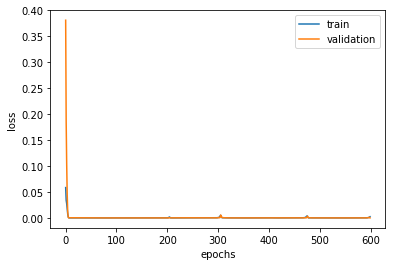

In [276]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])

Text(0.5,1,'DEXUSEU')

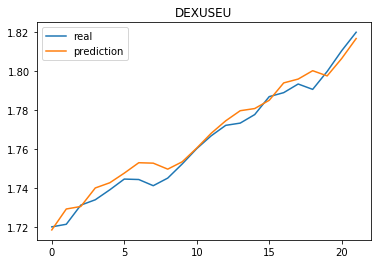

In [277]:
#We see this is pretty jumpy but we will keep it at 300 epochs. With more data, it should smooth out the loss
#Lets look at the fit
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))
plt.legend(['real','prediction'])
plt.title("DEXUSEU")

#This looks good for finding a trend

In [278]:
act = []
pred = []
for i in range(4):
    Xt = model.predict(X_test[i].reshape(1,1,1))
    print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
    pred.append(scl.inverse_transform(Xt))
    act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[1.7186229]], actual:[[1.72019]]
predicted:[[1.7293512]], actual:[[1.72152]]
predicted:[[1.7306389]], actual:[[1.73133]]
predicted:[[1.7401373]], actual:[[1.73408]]


In [279]:
act = []
pred = []
for i in range(22):
    Xt = model.predict(X_test[i].reshape(1,1,1))
    pred.append(scl.inverse_transform(Xt))
    act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

In [280]:
print(sum(act))

[[38.8156]]


In [281]:
dev=0
for i in range(X_test.shape[0]):
    dev+= abs(act[i]-pred[i])/act[i]


In [282]:
error=dev/(X_test.shape[0])*100
accuracy=1-error
print(error)


[[0.23360016]]


In [283]:
rmsedev=0
for i in range(X_test.shape[0]):
    
    rmsedev+= (act[i]-pred[i])*(act[i]-pred[i])

rmse=math.sqrt(rmsedev/X_test.shape[0])
print(rmse)

0.005083944241538855


In [284]:
std=data["close"].rolling(20).std()
std=std[-22:]
std

1240    0.040882
1241    0.036945
1242    0.032927
1243    0.029206
1244    0.025849
1245    0.023186
1246    0.021128
1247    0.020425
1248    0.020737
1249    0.021769
1250    0.022904
1251    0.023853
1252    0.024427
1253    0.024633
1254    0.025607
1255    0.026034
1256    0.026456
1257    0.025598
1258    0.025130
1259    0.025844
1260    0.026737
1261    0.028882
Name: close, dtype: float64

In [285]:
upper=[]
lower=[]
pred = []
act=[]
i=0
count=0
for items in std:
    Xt = model.predict(X_test[i].reshape(1,1,1))
    pred_tmp=scl.inverse_transform(Xt)[0][0]
    pred.append(pred_tmp)
    upper_tmp=scl.inverse_transform(Xt)[0][0]+items*2
    upper.append(upper_tmp)
    lower_tmp=scl.inverse_transform(Xt)[0][0]-items*2
    lower.append(lower_tmp)
    act_tmp=scl.inverse_transform(y_test[i].reshape(-1,1))[0][0]
    act.append(act_tmp)
    i+=1
    if(act_tmp>upper_tmp) or (act_tmp<lower_tmp):
        count+=1;


print(pred)
print(upper)
print(act)
count


[1.7186229, 1.7293512, 1.7306389, 1.7401373, 1.7427999, 1.747738, 1.7530823, 1.7528598, 1.7497907, 1.7535663, 1.7605952, 1.7681954, 1.7745749, 1.7797542, 1.7808673, 1.7850976, 1.7940127, 1.7959871, 1.8002748, 1.7976133, 1.8065076, 1.8167754]
[1.8003874513021783, 1.8032406777567045, 1.7964926347567614, 1.7985503372908462, 1.7944981722895998, 1.794109933658975, 1.7953387275295738, 1.7937099309528666, 1.7912648780387581, 1.7971035687845625, 1.8064036387639553, 1.815901238726378, 1.823429040810574, 1.8290195742775337, 1.832081233200945, 1.8371663097471347, 1.8469246974019662, 1.8471826069722683, 1.8505339106504157, 1.849301710572053, 1.8599812218511227, 1.874540279172427]
[1.72019, 1.72152, 1.73133, 1.73408, 1.73918, 1.7447, 1.74447, 1.7413000000000003, 1.7451999999999999, 1.75246, 1.7603099999999998, 1.7669, 1.7722499999999999, 1.7734, 1.77777, 1.78698, 1.78902, 1.79345, 1.7907000000000002, 1.7998900000000002, 1.8105, 1.8199999999999998]


0

Text(0.5,1,'LIBOR')

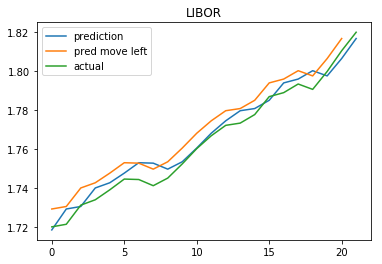

In [288]:
plt.plot(pred)
plt.plot(pred[-21:])
plt.plot(act)
plt.legend(['prediction',"pred move left",'actual'])
plt.title("LIBOR")


Text(0.5,1,'LIBOR,  Multiplier=2')

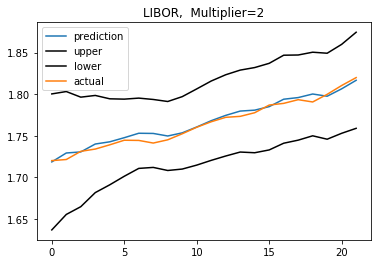

In [289]:
plt.plot(pred)
plt.plot(upper, color="black")
plt.plot(lower, color="black")


plt.plot(act)
plt.legend(['prediction',"upper","lower",'actual'])
plt.title("LIBOR,  Multiplier=2")

Text(0.5,1,'LIBOR,  Multiplier=1')

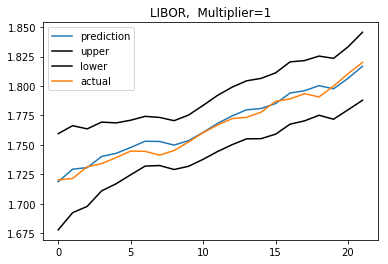

In [291]:
upper=[]
lower=[]
pred = []
act=[]
i=0
count=0
for items in std:
    Xt = model.predict(X_test[i].reshape(1,1,1))
    pred_tmp=scl.inverse_transform(Xt)[0][0]
    pred.append(pred_tmp)
    upper_tmp=scl.inverse_transform(Xt)[0][0]+items
    upper.append(upper_tmp)
    lower_tmp=scl.inverse_transform(Xt)[0][0]-items
    lower.append(lower_tmp)
    act_tmp=scl.inverse_transform(y_test[i].reshape(-1,1))[0][0]
    act.append(act_tmp)
    i+=1
    if(act_tmp>upper_tmp) or (act_tmp<lower_tmp):
        count+=1;
plt.plot(pred)
plt.plot(upper, color="black")
plt.plot(lower, color="black")


plt.plot(act)
plt.legend(['prediction',"upper","lower",'actual'])
plt.title("LIBOR,  Multiplier=1")

1


Text(0.5,1,'LIBOR,  Multiplier=0.5')

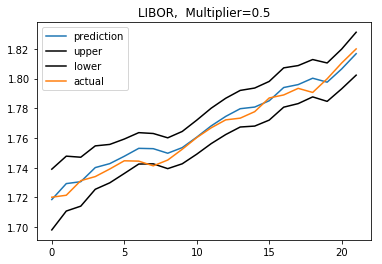

In [295]:
upper=[]
lower=[]
pred = []
act=[]
i=0
count=0
for items in std:
    Xt = model.predict(X_test[i].reshape(1,1,1))
    pred_tmp=scl.inverse_transform(Xt)[0][0]
    pred.append(pred_tmp)
    upper_tmp=scl.inverse_transform(Xt)[0][0]+items*0.5
    upper.append(upper_tmp)
    lower_tmp=scl.inverse_transform(Xt)[0][0]-items*0.5
    lower.append(lower_tmp)
    act_tmp=scl.inverse_transform(y_test[i].reshape(-1,1))[0][0]
    act.append(act_tmp)
    i+=1
    if(act_tmp>upper_tmp) or (act_tmp<lower_tmp):
        count+=1;
print(count)
plt.plot(pred)
plt.plot(upper, color="black")
plt.plot(lower, color="black")


plt.plot(act)
plt.legend(['prediction',"upper","lower",'actual'])
plt.title("LIBOR,  Multiplier=0.5")